In [1]:
import json
from beir import util, LoggingHandler
from beir.retrieval import models
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.evaluation import EvaluateRetrieval
from beir.retrieval.search.dense import DenseRetrievalExactSearch as DRES
import logging
import pathlib, os

#### Just some code to print debug information to stdout
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

/home/lyu/anaconda3/envs/lijun/lib/python3.8/site-packages/beir/util.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
dataset = "scifact"
url = "https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{}.zip".format(dataset)
out_dir = os.path.join(pathlib.Path(os.getcwd()).parent.absolute(), "datasets")
data_path = util.download_and_unzip(url, out_dir)

2022-08-22 08:55:25 - Downloading scifact.zip ...


/storage/home/lyu/datasets/scifact.zip:   0%|          | 0.00/2.69M [00:00<?, ?iB/s]

2022-08-22 08:55:25 - Unzipping scifact.zip ...


In [4]:
#### Provide the data_path where scifact has been downloaded and unzipped
corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")

#### Load the SBERT model and retrieve using cosine-similarity
model = DRES(models.SentenceBERT("msmarco-distilbert-base-tas-b"), batch_size=16)
retriever = EvaluateRetrieval(model, score_function="dot") # or "cos_sim" for cosine similarity
results = retriever.retrieve(corpus, queries)

#### Evaluate your model with NDCG@k, MAP@K, Recall@K and Precision@K  where k = [1,3,5,10,100,1000] 
ndcg, _map, recall, precision = retriever.evaluate(qrels, results, retriever.k_values)

2022-08-22 08:56:48 - Loading Corpus...


  0%|          | 0/5183 [00:00<?, ?it/s]

2022-08-22 08:56:49 - Loaded 5183 TEST Documents.
2022-08-22 08:56:49 - Doc Example: {'text': 'Alterations of the architecture of cerebral white matter in the developing human brain can affect cortical development and result in functional disabilities. A line scan diffusion-weighted magnetic resonance imaging (MRI) sequence with diffusion tensor analysis was applied to measure the apparent diffusion coefficient, to calculate relative anisotropy, and to delineate three-dimensional fiber architecture in cerebral white matter in preterm (n = 17) and full-term infants (n = 7). To assess effects of prematurity on cerebral white matter development, early gestation preterm infants (n = 10) were studied a second time at term. In the central white matter the mean apparent diffusion coefficient at 28 wk was high, 1.8 microm2/ms, and decreased toward term to 1.2 microm2/ms. In the posterior limb of the internal capsule, the mean apparent diffusion coefficients at both times were similar (1.2 vers

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

2022-08-22 08:56:50 - Lock 140376686644192 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/.gitattributes.lock
2022-08-22 08:56:50 - Lock 140381006569184 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/1_Pooling/config.json.lock


Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

2022-08-22 08:56:51 - Lock 140381006569184 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/1_Pooling/config.json.lock
2022-08-22 08:56:51 - Lock 140376686642560 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/README.md.lock


Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

2022-08-22 08:56:52 - Lock 140376686642560 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/README.md.lock
2022-08-22 08:56:52 - Lock 140376677865648 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/config.json.lock


Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

2022-08-22 08:56:53 - Lock 140376677865648 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/config.json.lock
2022-08-22 08:56:53 - Lock 140376686644192 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/config_sentence_transformers.json.lock


Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

2022-08-22 08:56:54 - Lock 140376686644192 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/config_sentence_transformers.json.lock
2022-08-22 08:56:54 - Lock 140376675263584 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/pytorch_model.bin.lock


Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

2022-08-22 08:57:03 - Lock 140376675263584 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/pytorch_model.bin.lock
2022-08-22 08:57:03 - Lock 140376686643184 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/sentence_bert_config.json.lock


Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

2022-08-22 08:57:04 - Lock 140376686643184 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/sentence_bert_config.json.lock
2022-08-22 08:57:04 - Lock 140376677864784 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/special_tokens_map.json.lock


Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

2022-08-22 08:57:05 - Lock 140376677864784 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/special_tokens_map.json.lock
2022-08-22 08:57:05 - Lock 140376675141424 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/tokenizer.json.lock


Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

2022-08-22 08:57:06 - Lock 140376675141424 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/tokenizer.json.lock
2022-08-22 08:57:07 - Lock 140376686642560 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/tokenizer_config.json.lock


Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

2022-08-22 08:57:07 - Lock 140376686642560 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/tokenizer_config.json.lock
2022-08-22 08:57:07 - Lock 140376686643184 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/vocab.txt.lock


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

2022-08-22 08:57:08 - Lock 140376686643184 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/vocab.txt.lock
2022-08-22 08:57:09 - Lock 140376686644192 acquired on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/modules.json.lock


Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

2022-08-22 08:57:09 - Lock 140376686644192 released on /home/lyu/.cache/torch/sentence_transformers/sentence-transformers_msmarco-distilbert-base-tas-b/modules.json.lock
2022-08-22 08:57:13 - Use pytorch device: cpu
2022-08-22 08:57:13 - Encoding Queries...


/home/lyu/anaconda3/envs/lijun/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729009598/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2022-08-22 08:57:17 - Sorting Corpus by document length (Longest first)...
2022-08-22 08:57:17 - Encoding Corpus in batches... Warning: This might take a while!
2022-08-22 08:57:17 - Scoring Function: Dot Product (dot)
2022-08-22 08:57:17 - Encoding Batch 1/1...


Batches:   0%|          | 0/324 [00:00<?, ?it/s]

2022-08-22 09:07:32 - For evaluation, we ignore identical query and document ids (default), please explicitly set ``ignore_identical_ids=False`` to ignore this.
2022-08-22 09:07:32 - 

2022-08-22 09:07:32 - NDCG@1: 0.5333
2022-08-22 09:07:32 - NDCG@3: 0.5990
2022-08-22 09:07:32 - NDCG@5: 0.6215
2022-08-22 09:07:32 - NDCG@10: 0.6428
2022-08-22 09:07:32 - NDCG@100: 0.6698
2022-08-22 09:07:32 - NDCG@1000: 0.6811
2022-08-22 09:07:32 - 

2022-08-22 09:07:32 - MAP@1: 0.5086
2022-08-22 09:07:32 - MAP@3: 0.5730
2022-08-22 09:07:32 - MAP@5: 0.5892
2022-08-22 09:07:32 - MAP@10: 0.5992
2022-08-22 09:07:32 - MAP@100: 0.6046
2022-08-22 09:07:32 - MAP@1000: 0.6049
2022-08-22 09:07:32 - 

2022-08-22 09:07:32 - Recall@1: 0.5086
2022-08-22 09:07:32 - Recall@3: 0.6473
2022-08-22 09:07:32 - Recall@5: 0.6998
2022-08-22 09:07:32 - Recall@10: 0.7615
2022-08-22 09:07:32 - Recall@100: 0.8910
2022-08-22 09:07:32 - Recall@1000: 0.9833
2022-08-22 09:07:32 - 

2022-08-22 09:07:32 - P@1: 0.5333
2022-08-22 09:07:32

In [3]:
import random
from sklearn.utils import check_random_state

In [9]:
random_state = check_random_state(10)
random_state.randint(1, 10, 20)

array([5, 1, 2, 1, 2, 9, 1, 9, 7, 5, 4, 1, 5, 7, 9, 2, 9, 5, 2, 4])

In [11]:
random_state.randint(1, 10, 20).size

20

In [12]:
import nltk

In [20]:
import numpy as np
' '.join(np.array(nltk.word_tokenize("hello I'm lijun. "))[[2,3]])

"'m lijun"

In [18]:
random_state.choice(10, 1, replace=False)

array([1])

In [3]:
a = [1 if i>3 else 0 for i in range(5) ]
a

[0, 0, 0, 0, 1]

In [4]:
import numpy as np


In [6]:
np.sign([1, 2,3, 0.5, 0, -5])

array([ 1.,  1.,  1.,  1.,  0., -1.])

In [17]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.linear_model import LogisticRegression, SGDClassifier
clf = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', SGDClassifier())])

In [18]:
clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

In [56]:
twenty_train.data[0]

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [60]:
len(clf['vect'].get_feature_names())

35788

In [23]:
import matplotlib.pyplot as plt

In [61]:
coef = clf['clf'].coef_.copy()
coef.shape

(4, 35788)

In [33]:
(coef[0][:10] > 0).astype(int)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [64]:
vocab = clf['vect'].get_feature_names()[:20]


In [102]:
y = np.sort(-np.abs(coef[0]))[:20]

In [111]:
y

array([-2.70804732, -2.18541018, -1.81193416, -1.69225145, -1.68019354,
       -1.58792896, -1.58503175, -1.56152644, -1.55966642, -1.55163205,
       -1.55115831, -1.43975717, -1.41376037, -1.41084717, -1.37851632,
       -1.3774855 , -1.37089999, -1.32931002, -1.29408072, -1.27330515])

In [110]:
y.

array([-5.41609464, -4.37082036, -3.62386832, -3.3845029 , -3.36038708,
       -3.17585793, -3.1700635 , -3.12305287, -3.11933284, -3.1032641 ,
       -3.10231661, -2.87951434, -2.82752075, -2.82169435, -2.75703264,
       -2.754971  , -2.74179998, -2.65862004, -2.58816143, -2.5466103 ])

In [108]:
np.argsort(np.array([0,3,9,-1,6,10,2]))

array([3, 0, 6, 1, 4, 2, 5])

In [103]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [104]:
ind = np.argsort(-np.abs(coef[0]))[:20]
vocab = np.array(clf['vect'].get_feature_names())[ind]

In [87]:
y

array([-2.70804732, -2.18541018, -1.81193416, -1.69225145, -1.68019354,
       -1.58792896, -1.58503175, -1.56152644, -1.55966642, -1.55163205,
       -1.55115831, -1.43975717, -1.41376037, -1.41084717, -1.37851632,
       -1.3774855 , -1.37089999, -1.32931002, -1.29408072, -1.27330515,
       -1.26831852, -1.2634236 , -1.25005897, -1.24584907, -1.24286572,
       -1.23564025, -1.22625729, -1.22284911, -1.21161705, -1.18842226,
       -1.18593307, -1.1835615 , -1.17434839, -1.16539884, -1.15604927,
       -1.15279616, -1.14955998, -1.13992071, -1.13395305, -1.1319165 ,
       -1.1319165 , -1.128291  , -1.1185388 , -1.11791258, -1.1108728 ,
       -1.10285721, -1.09537817, -1.092112  , -1.09058172, -1.08881158])

<ipython-input-107-13b52ca71d05>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vocab, fontsize=18)


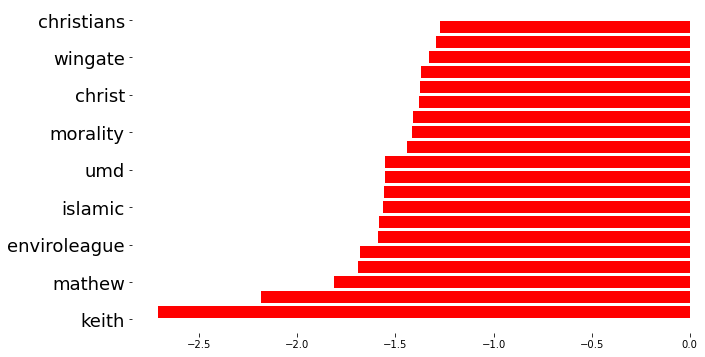

In [107]:

fig, ax = plt.subplots(figsize=(10, 6))



colors = np.array(['g']*len(y))
mask = np.where(y < 0)[0]
colors[mask] = 'r'


fig.patch.set_visible(False)
#ax.axis('off')
pos = np.arange(len(y)) + .5
ax.barh(pos, y, align='center', color=colors)
ax.set_yticklabels(vocab, fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#fig.savefig('exs.pdf')

In [47]:
import seaborn as sns

<AxesSubplot:>

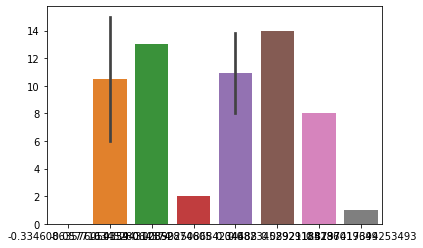

In [49]:
sns.barplot(x=y, y=np.arange(len(y)))